In [2]:
import FinanceDataReader as fdr

In [3]:
# 가설: 나스닥 데이터의 변동성이 클떄는 주가가 하락한다.

In [4]:
# 크롤링
nasdaq = fdr.DataReader("IXIC", "2000")

C:\Users\Gk\anaconda3\lib\site-packages\FinanceDataReader\investing\data.py:58: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(jo['quotes'])


In [5]:
nasdaq

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2000-01-03,4131.15,4186.19,4192.19,3989.71,0.000000e+00,0.0152
2000-01-04,3901.69,4020.00,4073.25,3898.23,0.000000e+00,-0.0555
2000-01-05,3877.54,3854.35,3924.21,3734.87,0.000000e+00,-0.0062
2000-01-06,3727.13,3834.44,3868.76,3715.62,0.000000e+00,-0.0388
2000-01-07,3882.62,3711.09,3882.67,3711.09,0.000000e+00,0.0417
...,...,...,...,...,...,...
2020-04-03,7373.08,7477.27,7518.72,7288.11,8.361000e+08,-0.0153
2020-04-06,7913.24,7660.17,7938.33,7617.79,9.801500e+08,0.0733
2020-04-07,7887.26,8129.99,8146.43,7881.22,1.000000e+09,-0.0033


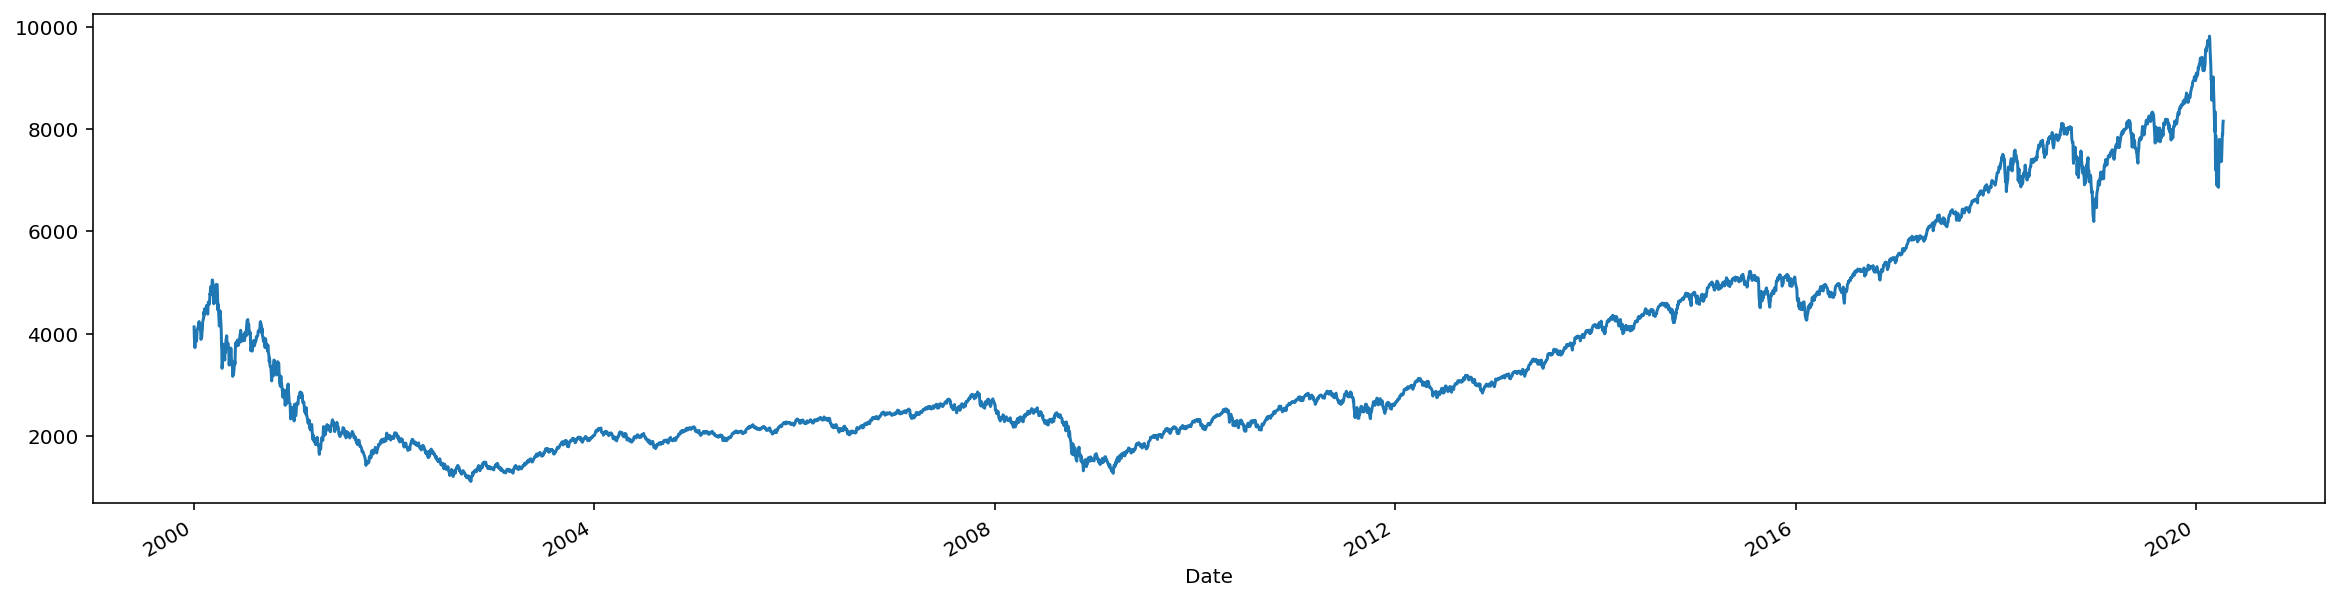

In [7]:
import matplotlib.pyplot as plt
nasdaq["Close"].plot(figsize=(20, 5))
plt.show()
# %matplotlib.show()

UsageError: Line magic function `%matplotlib.show()` not found.


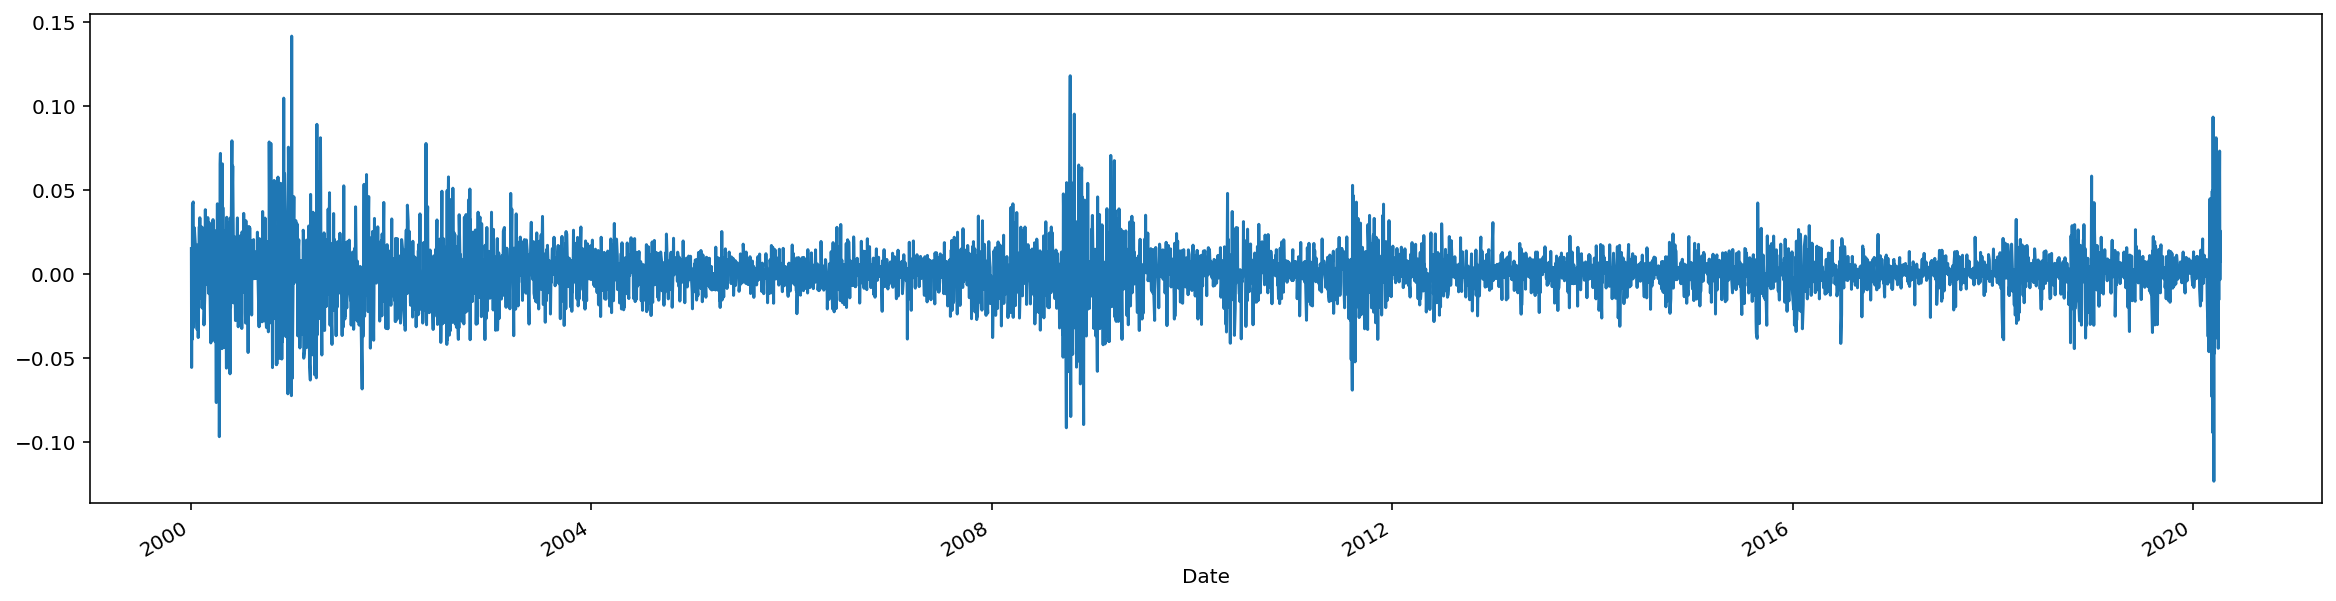

In [10]:
nasdaq["Change"].plot(figsize=(20, 5))
# plt.show()
%matplotlib.show()

In [ ]:
# TLP (미국채권 20년 ETF), AAPL을 자산의 50:50의 비율로 한달에 한번 리밸런싱 했을 때 수익율

In [11]:
start_date, end_date = "2018-01-01", "2020-04-30"

In [12]:
apple = fdr.DataReader("AAPL", start_date, end_date)
tlt = fdr.DataReader("TLT", start_date, end_date)

C:\Users\Gk\anaconda3\lib\site-packages\FinanceDataReader\investing\data.py:58: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(jo['quotes'])


In [16]:
asset, apple_stock, tlt_stock = 100000, 0, 0
apple_rate, tlt_rate = 0.8, 0.2
date = pd.date_range(start=start_date, end=end_date, freq="M")
dates = date.strftime("%Y-%m")

In [17]:
datas = []

for date in dates:
#     print(date)
    # 매월 마지막 거래일
    curr_date = str(apple.loc[date].index[-1]).split(" ")[0]
    
    # 주가 데이터
    apple_price = apple.loc[date]["Close"][-1]
    tlt_price = tlt.loc[date]["Close"][-1]
#     print(apple_price, tlt_price)
    
    # 주식을 전체 자산으로 변경 : 모든 주식을 팔아서 자산으로 만듦
    asset += apple_price * apple_stock
    asset += tlt_price * tlt_stock
    
    # 자산 비율을 나누기
    apple_asset = int(asset * apple_rate)
    tlt_asset = int(asset * tlt_rate)
    
    # 주식 구매
    apple_stock = apple_asset // apple_price
    tlt_stock = tlt_asset // tlt_price
    
    # 주식 구매 후 잔돈 저장
    apple_asset = apple_asset % apple_price
    tlt_asset = tlt_asset % tlt_price
    asset = round(apple_asset + tlt_asset, 2)
    
    # 전체 자산
    total_asset = asset
    total_asset += apple_stock * apple_price
    total_asset += tlt_stock * tlt_price

    
#    print(curr_date)
#    print(apple_price, tlt_price, apple_stock, tlt_stock, asset, total_asset)
#    print()

    datas.append({
        "curr_date":curr_date, "apple_price":apple_price, "tlt_price":tlt_price, "apple_stock":apple_stock,
        "tlt_stock":tlt_stock, "asset":asset, "total_asset":total_asset,
    })
    
df = pd.DataFrame(datas)
df.tail()

,curr_date,apple_price,tlt_price,apple_stock,tlt_stock,asset,total_asset
23,2019-12-31,293.65,135.48,444.0,241.0,304.72,163336.0
24,2020-01-31,309.51,145.90,446.0,236.0,414.14,172888.0
25,2020-02-28,273.36,155.31,465.0,204.0,189.36,158985.0
26,2020-03-31,254.29,164.97,478.0,184.0,181.90,152087.0
27,2020-04-09,267.99,165.39,473.0,191.0,363.24,158712.0


In [19]:
# 수익율
benefit = round((df.iloc[-1]["total_asset"] / df.iloc[0]["total_asset"] - 1) * 100, 2)
benefit

58.71